### XGBoost Time Series Forecast model
#### https://github.com/ajhalthor/Time-Series-Forecasting/blob/main/Order%20Forecasting.ipynb
#### https://www.youtube.com/watch?v=Wsfz3i1AXzY

# 1. Data Collection

In [1]:
import pandas as pd

##################### Google Colab #########################################################

# from google.colab import files
# import io

# rest_1_order_url = 'https://www.kaggle.com/henslersoftware/19560-indian-takeaway-orders?select=restaurant-1-orders.csv'
# rest_1_product_url='https://www.kaggle.com/henslersoftware/19560-indian-takeaway-orders?select=restaurant-1-products-price.csv'

# rest_2_order_url = 'https://www.kaggle.com/henslersoftware/19560-indian-takeaway-orders?select=restaurant-2-orders.csv'
# rest_2_product_url = 'https://www.kaggle.com/henslersoftware/19560-indian-takeaway-orders?select=restaurant-2-products-price.csv'

# df1=pd.read_csv(rest_1_order_url,error_bad_lines=False)
# df1

### read using local upload files  ###
# uploaded_1 = files.upload()
# df1 =pd.read_csv(io.BytesIO(uploaded_1['restaurant-1-orders.csv']))

# uploaded_2 = files.upload()
# df2 =pd.read_csv(io.BytesIO(uploaded_2['restaurant-1-products-price.csv']))

# uploaded_3 = files.upload()
# df3 =pd.read_csv(io.BytesIO(uploaded_3['restaurant-2-orders.csv']))

# uploaded_4 = files.upload()
# df4 =pd.read_csv(io.BytesIO(uploaded_4['restaurant-2-products-price.csv']))



#################################################################################################################################################



df1=pd.read_csv('C:/Users/User/Desktop/TensorFlow/Machine_learning/xgboost/Time-Series-Forecasting-main/data/restaurant-1-orders.csv')



In [2]:
df1

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7
74814,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6
74815,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9
74816,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6


In [3]:
# rename dataframe 
order_1=df1
order_1.sample(3) # random return rows from dataframe

order_1['date']=pd.to_datetime(order_1['Order Date'].str[:10])
order_1.head()


,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,date
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6,2019-03-08
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6,2019-03-08
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6,2019-03-08
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6,2019-03-08
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6,2019-03-08


# 2. Data Cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def data_cleaning(df,replace_missing_value):
    # return dataframe thru data cleaning process

  def basic_data_info(df):
    # check dataset overall information
    print('\nData Cleaning Report - Basic Data Informations\n')
    print(order_1.info())

    print('\nData Cleaning Report - Summary of total "NAN" rows\n')
    # identify amount of  "NAN" row
    print(order_1.isna().sum())



  def search_remove_individual_value_features(df):

    column_name = df.columns
    remove_single_value_features_list=[]

    for name in column_name:
      if len(df[name].unique())==1:
        remove_single_value_features_list=np.append(name,remove_single_value_features_list)
      elif len(df[name].unique())==2 and np.nan in(df[name].unique()):
        remove_single_value_features_list=np.append(name,remove_single_value_features_list)

    if len(remove_single_value_features_list)>=1:
      print('\nData Cleaning Report - Individual Value feature removed : ',remove_single_value_features_list)
      df.drop(remove_single_value_features_list,axis=1,inplace=True)
    else:
      print("\nData Cleaning Report - No Individual Value feature Found !!\n")
      
    return df


  def replace_missing_data(df,replace_missing_value):
    # user can define what value to fill in to missing data
    # "nan" and "blank space" consider missing data

    column_list= df.columns
    missing_data_dict_list={} # Store "Empty Space: and "nan" row in dictionary by column name

    for column in column_list:
        if len(df.loc[df[column]==' '])!= 0 :
            missing_data_dict_list[column]=df.loc[df[column]==' '].index # index 
        elif len(df.loc[df[column]==np.nan])!=0:
            missing_data_dict_list[column]=df.loc[df[column]==np.nan].index
              
    ## replace missing data function
    if len(missing_data_dict_list)!=0 : # check empty_space_column dictionary is empty or not
      print('\nData Cleaning Report - Have Missing Data :',missing_data_dict_list)

      for key in missing_data_dict_list.keys():
          print(key)
          df.loc[missing_data_dict_list[key],key]=replace_missing_value # df.loc[idx list, column name] = 0
    else:
      print('\nData Cleaning Report - No Missing Data or "Nan" row Found !!\n')

    return df


  def blank_space_repalcement(df):
    # Dataframe Column Blank Space Replacement
    df.columns=df.columns.str.replace(' ','_')
    df.replace(' ','_',regex=True,inplace=True)

    return df

  basic_data_info(df)
  df=search_remove_individual_value_features(df)
  df=replace_missing_data(df,replace_missing_value)
  df=blank_space_repalcement(df)

  return df



In [5]:
order_1=data_cleaning(order_1,0)


Data Cleaning Report - Basic Data Informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    74818 non-null  int64         
 1   Order Date      74818 non-null  object        
 2   Item Name       74818 non-null  object        
 3   Quantity        74818 non-null  int64         
 4   Product Price   74818 non-null  float64       
 5   Total products  74818 non-null  int64         
 6   date            74818 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 4.0+ MB
None

Data Cleaning Report - Summary of total "NAN" rows

Order Number      0
Order Date        0
Item Name         0
Quantity          0
Product Price     0
Total products    0
date              0
dtype: int64

Data Cleaning Report - No Individual Value feature Found !!


Data Cleaning Report

# 3. Exploratory Data Analysis

In [6]:
order_1

,Order_Number,Order_Date,Item_Name,Quantity,Product_Price,Total_products,date
0,16118,03/08/2019_20:25,Plain_Papadum,2,0.80,6,2019-03-08
1,16118,03/08/2019_20:25,King_Prawn_Balti,1,12.95,6,2019-03-08
2,16118,03/08/2019_20:25,Garlic_Naan,1,2.95,6,2019-03-08
3,16118,03/08/2019_20:25,Mushroom_Rice,1,3.95,6,2019-03-08
4,16118,03/08/2019_20:25,Paneer_Tikka_Masala,1,8.95,6,2019-03-08
...,...,...,...,...,...,...,...
74813,2518,18/05/2016_18:53,House_Red_wine_75cl,2,17.95,7,2016-05-18
74814,2503,14/05/2016_19:28,House_Red_wine_75cl,2,17.95,6,2016-05-14
74815,2467,10/05/2016_13:18,House_Red_wine_75cl,2,17.95,9,2016-10-05
74816,2249,07/04/2016_19:04,House_white_wine_75cl,1,17.95,6,2016-07-04


In [7]:
print(order_1.columns)
print(f"Total Number of order in : {order_1['Order_Number'].nunique()} ")

Index(['Order_Number', 'Order_Date', 'Item_Name', 'Quantity', 'Product_Price',
       'Total_products', 'date'],
      dtype='object')
Total Number of order in : 13397 


### Univariate Analysis 

### Daily Dataframe


## METHOD 1: Dataframe method

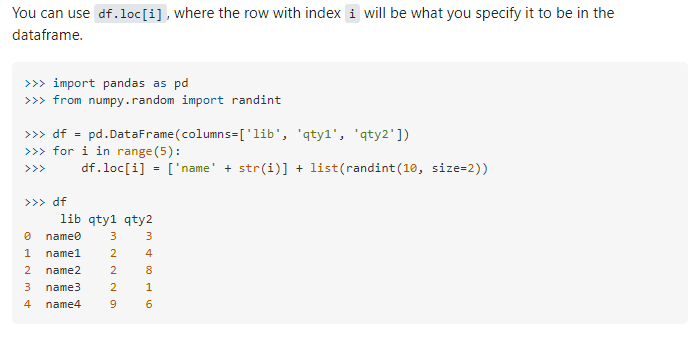

In [8]:
# Dataframe method create a new table 

daily_df=pd.DataFrame(columns=['date','order_quantity'])
order_date=order_1['date'].unique()

for date,i in zip(order_date,range(len(order_date))):
    daily_df.loc[i]=date , len(order_1[order_1['date']==date]['Order_Number'].unique()) # append new dataframe value by row index loc[]
    
# df_1['date']=pd.to_datetime(df_1['date'])
daily_df.sort_values(by='date',ascending=True,ignore_index=True,inplace=True)


In [9]:
daily_df.tail(50)

,date,order_quantity
1157,2019-07-17,7
1158,2019-07-18,11
1159,2019-07-19,28
1160,2019-07-20,24
1161,2019-07-21,18
1162,2019-07-22,5
1163,2019-07-23,9
1164,2019-07-24,8
1165,2019-07-25,12
1166,2019-07-26,31


In [10]:
print(order_1.info())
order_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_Number    74818 non-null  int64         
 1   Order_Date      74818 non-null  object        
 2   Item_Name       74818 non-null  object        
 3   Quantity        74818 non-null  int64         
 4   Product_Price   74818 non-null  float64       
 5   Total_products  74818 non-null  int64         
 6   date            74818 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 4.0+ MB
None


,Order_Number,Quantity,Product_Price,Total_products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [11]:
daily_df.describe()

C:\Users\User\AppData\Local\Temp/ipykernel_15960/2760954780.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_df.describe()


,date,order_quantity
count,1207,1207.0
unique,1207,37.0
top,2015-01-09 00:00:00,8.0
freq,1,95.0
first,2015-01-09 00:00:00,NaN
last,2019-12-07 00:00:00,NaN


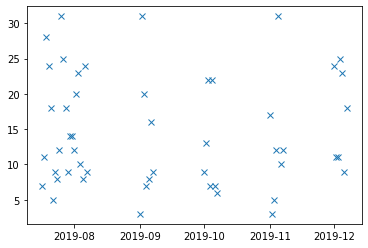

In [12]:
plt.figure(1)
plt.plot(daily_df['date'].tail(50),daily_df['order_quantity'].tail(50),'x')

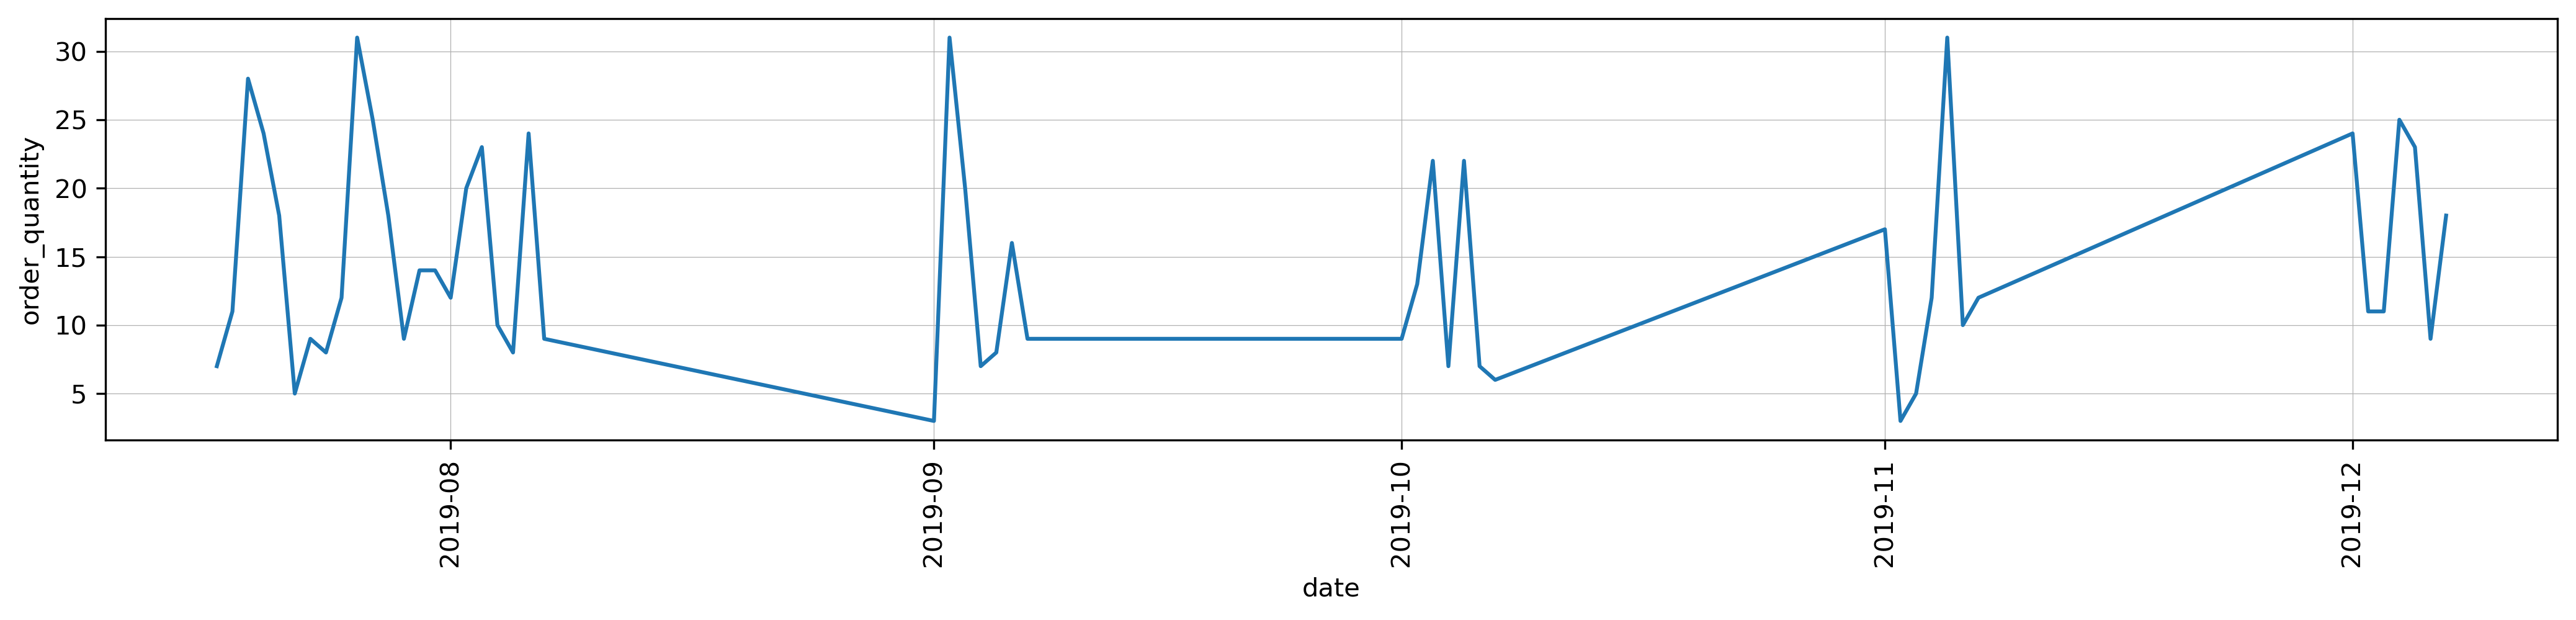

In [13]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_df.tail(50), x='date', y='order_quantity')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

## Method 2 : Query Function Method

In [14]:
# Query Function

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

def load_query(path):
    with open(path) as file:
        return file.read()
    

In [15]:
# SQL method

query = load_query('C:/Users/User/Desktop/TensorFlow/Machine_learning/xgboost/Time-Series-Forecasting-main/queries/daily_orders.sql')
daily_orders_df = pysqldf(query)

In [16]:
daily_orders_df.tail(50)

,date,num_orders
1157,2019-07-17,7
1158,2019-07-18,11
1159,2019-07-19,28
1160,2019-07-20,24
1161,2019-07-21,18
1162,2019-07-22,5
1163,2019-07-23,9
1164,2019-07-24,8
1165,2019-07-25,12
1166,2019-07-26,31


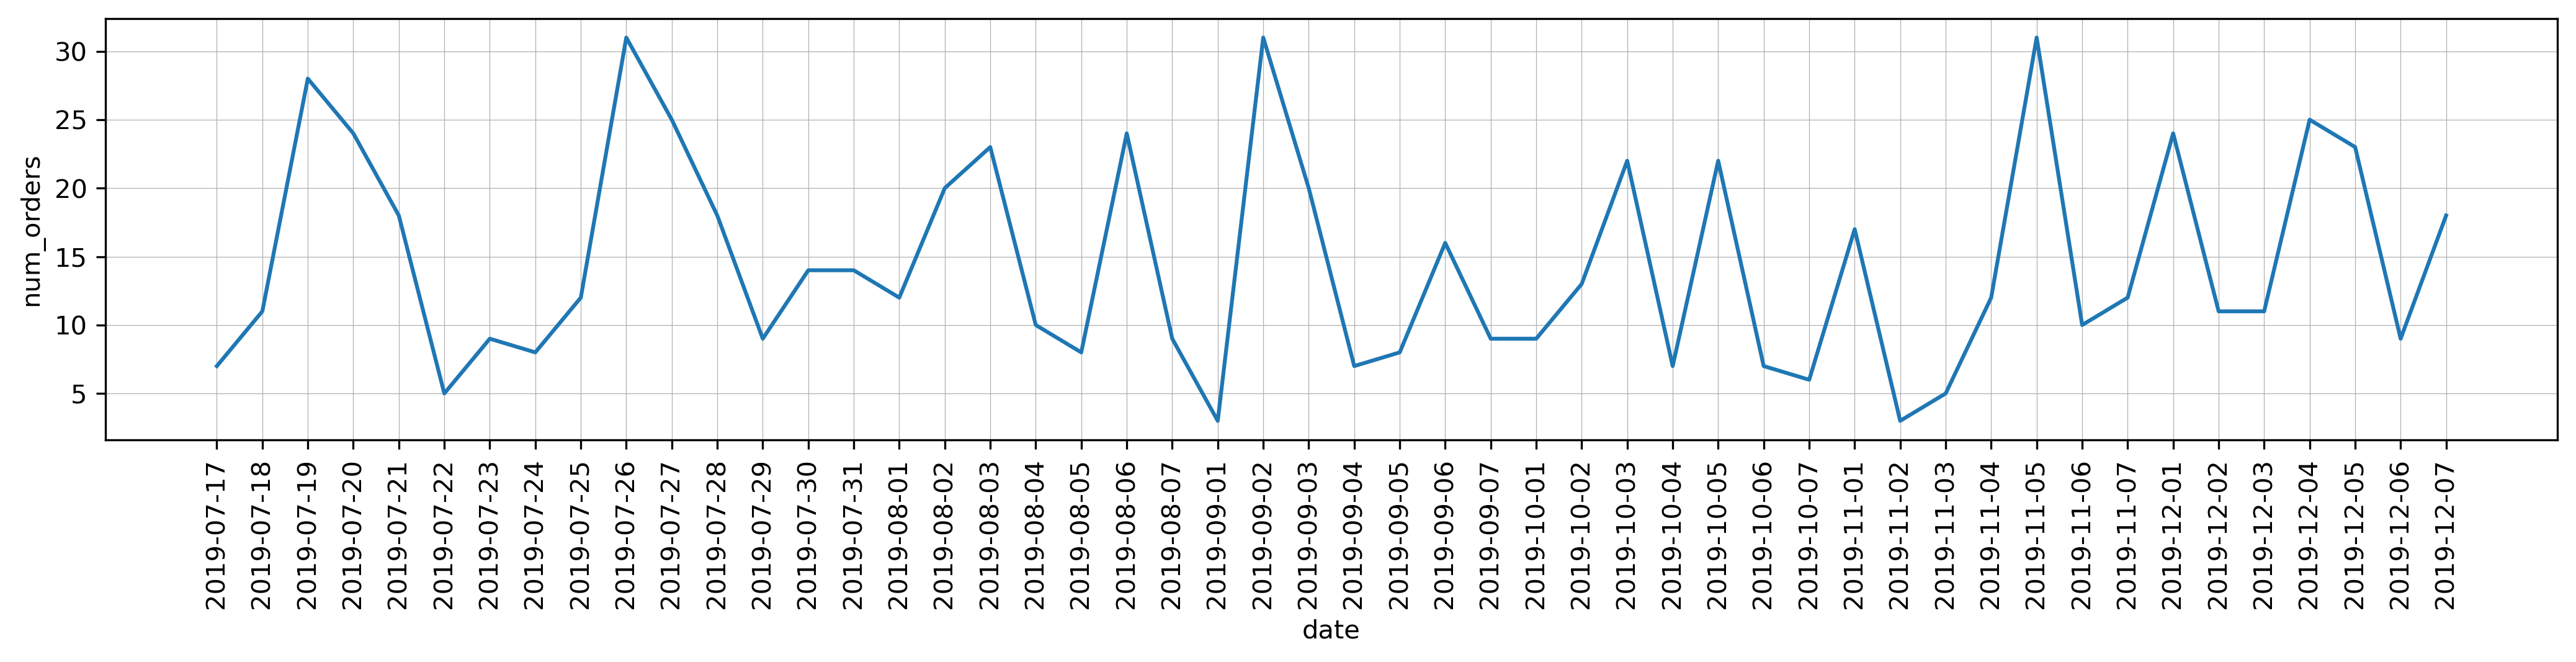

In [17]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_orders_df.tail(50), x='date', y='num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

### Weekly Dataframe

In [18]:
query = load_query('C:/Users/User/Desktop/TensorFlow/Machine_learning/xgboost/Time-Series-Forecasting-main/queries/weekly_orders.sql')
weekly_orders = pysqldf(query)

In [19]:
weekly_orders.head()

,week,num_orders
0,2015-01-05,8
1,2015-02-09,5
2,2015-08-03,3
3,2015-09-07,6
4,2015-09-28,7


In [20]:
weekly_orders.describe()

,num_orders
count,196.000000
mean,68.352041
std,29.787513
min,3.000000
25%,48.000000
50%,72.000000
75%,90.250000
max,145.000000


In [21]:
weekly_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        196 non-null    object
 1   num_orders  196 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


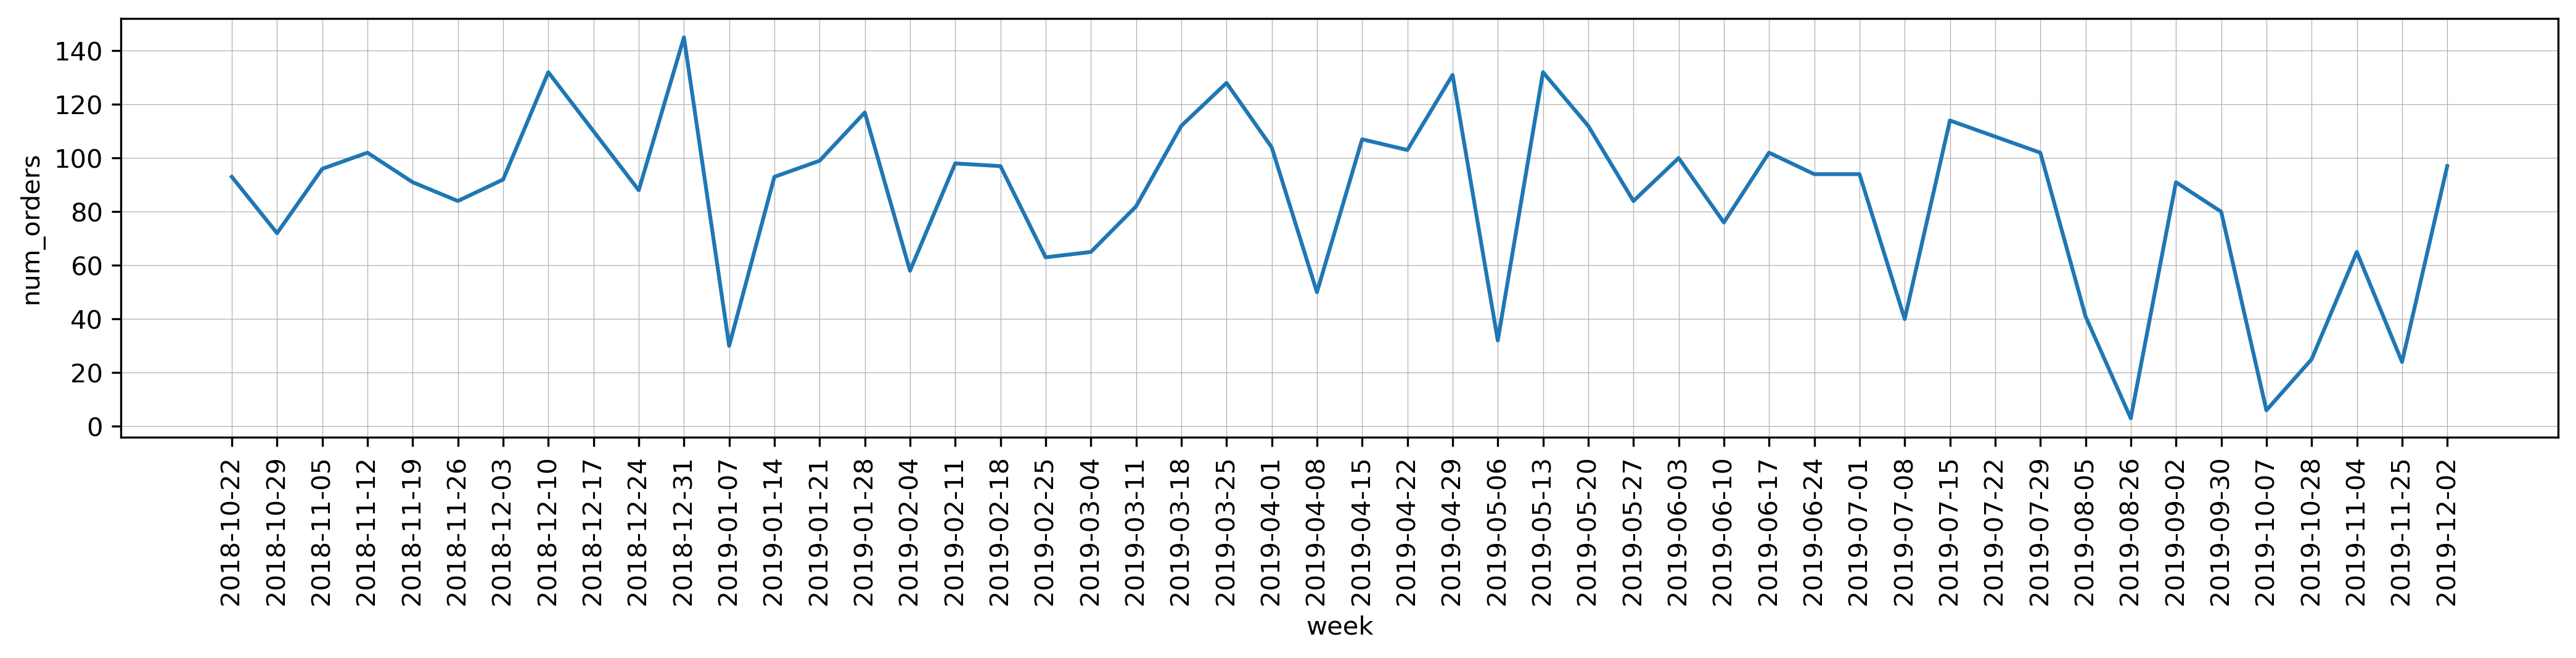

In [22]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y='num_orders')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

# 4. Model Training


In [23]:
query = load_query('C:/Users/User/Desktop/TensorFlow/Machine_learning/xgboost/Time-Series-Forecasting-main/queries/base.sql')
df = pysqldf(query)
df.to_csv('C:/Users/User/Desktop/TensorFlow/Machine_learning/xgboost/Time-Series-Forecasting-main/csvs/dataset.csv')

In [24]:
df.head()

,week,order_count_7_day,order_count_30_day,label
0,2016-01-04,0,0,40
1,2016-01-11,40,40,17
2,2016-02-01,0,57,26
3,2016-02-08,26,66,42
4,2016-02-29,0,68,15


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   week                190 non-null    object
 1   order_count_7_day   190 non-null    int64 
 2   order_count_30_day  190 non-null    int64 
 3   label               190 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.1+ KB


In [39]:
# NOTE !!!!
# Time Series prediction do not shuffle the training dataset using " train_test_split" 
# it will cause prediction to be inaccurate in actual predciton ( although training model will have good result )

import xgboost as xgb

features = ['order_count_7_day', 'order_count_30_day']
label = 'label'

test_df = df[df['week'] >= '2019-06-01']
train_df = df[df['week'] < '2019-06-01']

X_train , Y_train = train_df[features] ,train_df[label]
x_test , y_test = test_df[features] , test_df[label]



In [40]:
print(len(X_train))
print(len(Y_train))


173
173


Developer's note: You might see slight increase in MAE. This XGBRegressor optimizes squared loss by default. There isn't support for MAE since gradient boosting (may) require non-zero second order derivatives. Need to confirm

In [44]:
xgb_clf =xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500, learning_rate=0.01)
xgb_clf.fit(X_train,Y_train,early_stopping_rounds=20, eval_set=[(X_train,Y_train),(x_test,y_test)],eval_metric='mae')



[0]	validation_0-mae:68.79896	validation_1-mae:72.73835
[1]	validation_0-mae:68.12780	validation_1-mae:72.12848
[2]	validation_0-mae:67.46320	validation_1-mae:71.52456
[3]	validation_0-mae:66.80496	validation_1-mae:70.89913
[4]	validation_0-mae:66.15327	validation_1-mae:70.30690
[5]	validation_0-mae:65.50795	validation_1-mae:69.72041
[6]	validation_0-mae:64.86883	validation_1-mae:69.11306
[7]	validation_0-mae:64.23606	validation_1-mae:68.53793
[8]	validation_0-mae:63.60949	validation_1-mae:67.96839
[9]	validation_0-mae:62.98889	validation_1-mae:67.37858
[10]	validation_0-mae:62.37450	validation_1-mae:66.82005
[11]	validation_0-mae:61.76610	validation_1-mae:66.26696
[12]	validation_0-mae:61.16365	validation_1-mae:65.71924
[13]	validation_0-mae:60.56696	validation_1-mae:65.16515
[14]	validation_0-mae:59.97622	validation_1-mae:64.62994
[15]	validation_0-mae:59.39126	validation_1-mae:64.09995
[16]	validation_0-mae:58.81189	validation_1-mae:63.60182
[17]	validation_0-mae:58.23830	validation

[144]	validation_0-mae:18.93494	validation_1-mae:34.60605
[145]	validation_0-mae:18.79677	validation_1-mae:34.56417
[146]	validation_0-mae:18.66344	validation_1-mae:34.47000
[147]	validation_0-mae:18.53014	validation_1-mae:34.40190
[148]	validation_0-mae:18.40113	validation_1-mae:34.33145
[149]	validation_0-mae:18.26818	validation_1-mae:34.28966
[150]	validation_0-mae:18.14343	validation_1-mae:34.22350
[151]	validation_0-mae:18.01693	validation_1-mae:34.13347
[152]	validation_0-mae:17.89416	validation_1-mae:34.06844
[153]	validation_0-mae:17.77327	validation_1-mae:34.01892
[154]	validation_0-mae:17.65218	validation_1-mae:33.92646
[155]	validation_0-mae:17.53241	validation_1-mae:33.85498
[156]	validation_0-mae:17.41430	validation_1-mae:33.77952
[157]	validation_0-mae:17.29526	validation_1-mae:33.73865
[158]	validation_0-mae:17.18186	validation_1-mae:33.65256
[159]	validation_0-mae:17.06928	validation_1-mae:33.58545
[160]	validation_0-mae:16.95647	validation_1-mae:33.53713
[161]	validati

[286]	validation_0-mae:9.11327	validation_1-mae:30.69511
[287]	validation_0-mae:9.08013	validation_1-mae:30.69747
[288]	validation_0-mae:9.05462	validation_1-mae:30.68137
[289]	validation_0-mae:9.02031	validation_1-mae:30.68040
[290]	validation_0-mae:8.99476	validation_1-mae:30.67138
[291]	validation_0-mae:8.96982	validation_1-mae:30.65571
[292]	validation_0-mae:8.93634	validation_1-mae:30.65611
[293]	validation_0-mae:8.90444	validation_1-mae:30.65788
[294]	validation_0-mae:8.87966	validation_1-mae:30.64931
[295]	validation_0-mae:8.85540	validation_1-mae:30.63399
[296]	validation_0-mae:8.82418	validation_1-mae:30.63466
[297]	validation_0-mae:8.79516	validation_1-mae:30.63338
[298]	validation_0-mae:8.77065	validation_1-mae:30.62850
[299]	validation_0-mae:8.74594	validation_1-mae:30.62148
[300]	validation_0-mae:8.71531	validation_1-mae:30.62154
[301]	validation_0-mae:8.69070	validation_1-mae:30.61324
[302]	validation_0-mae:8.66767	validation_1-mae:30.60568
[303]	validation_0-mae:8.64519	

[430]	validation_0-mae:6.89358	validation_1-mae:30.14274
[431]	validation_0-mae:6.88426	validation_1-mae:30.13830
[432]	validation_0-mae:6.87761	validation_1-mae:30.13816
[433]	validation_0-mae:6.86831	validation_1-mae:30.13381
[434]	validation_0-mae:6.85955	validation_1-mae:30.13055
[435]	validation_0-mae:6.85300	validation_1-mae:30.13051
[436]	validation_0-mae:6.84548	validation_1-mae:30.12680
[437]	validation_0-mae:6.83857	validation_1-mae:30.12240
[438]	validation_0-mae:6.82963	validation_1-mae:30.12190
[439]	validation_0-mae:6.82116	validation_1-mae:30.11883
[440]	validation_0-mae:6.81256	validation_1-mae:30.11838
[441]	validation_0-mae:6.80531	validation_1-mae:30.11679
[442]	validation_0-mae:6.79861	validation_1-mae:30.11260
[443]	validation_0-mae:6.79243	validation_1-mae:30.11285
[444]	validation_0-mae:6.78393	validation_1-mae:30.11220
[445]	validation_0-mae:6.77735	validation_1-mae:30.10994
[446]	validation_0-mae:6.77091	validation_1-mae:30.10592
[447]	validation_0-mae:6.76399	

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
pred=xgb_clf.predict(x_test)

In [46]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(pred)

In [47]:
test_df

,week,order_count_7_day,order_count_30_day,label,predictions
0,2019-06-03,84,416,100,67.084473
1,2019-06-10,100,428,76,91.987198
2,2019-06-17,76,433,102,109.639709
3,2019-06-24,102,414,94,86.380371
4,2019-07-01,94,389,94,88.200226
5,2019-07-08,94,366,40,87.130653
6,2019-07-15,40,377,114,78.782501
7,2019-07-22,114,381,108,85.800102
8,2019-07-29,108,393,102,74.025574
9,2019-08-05,102,406,41,90.788155


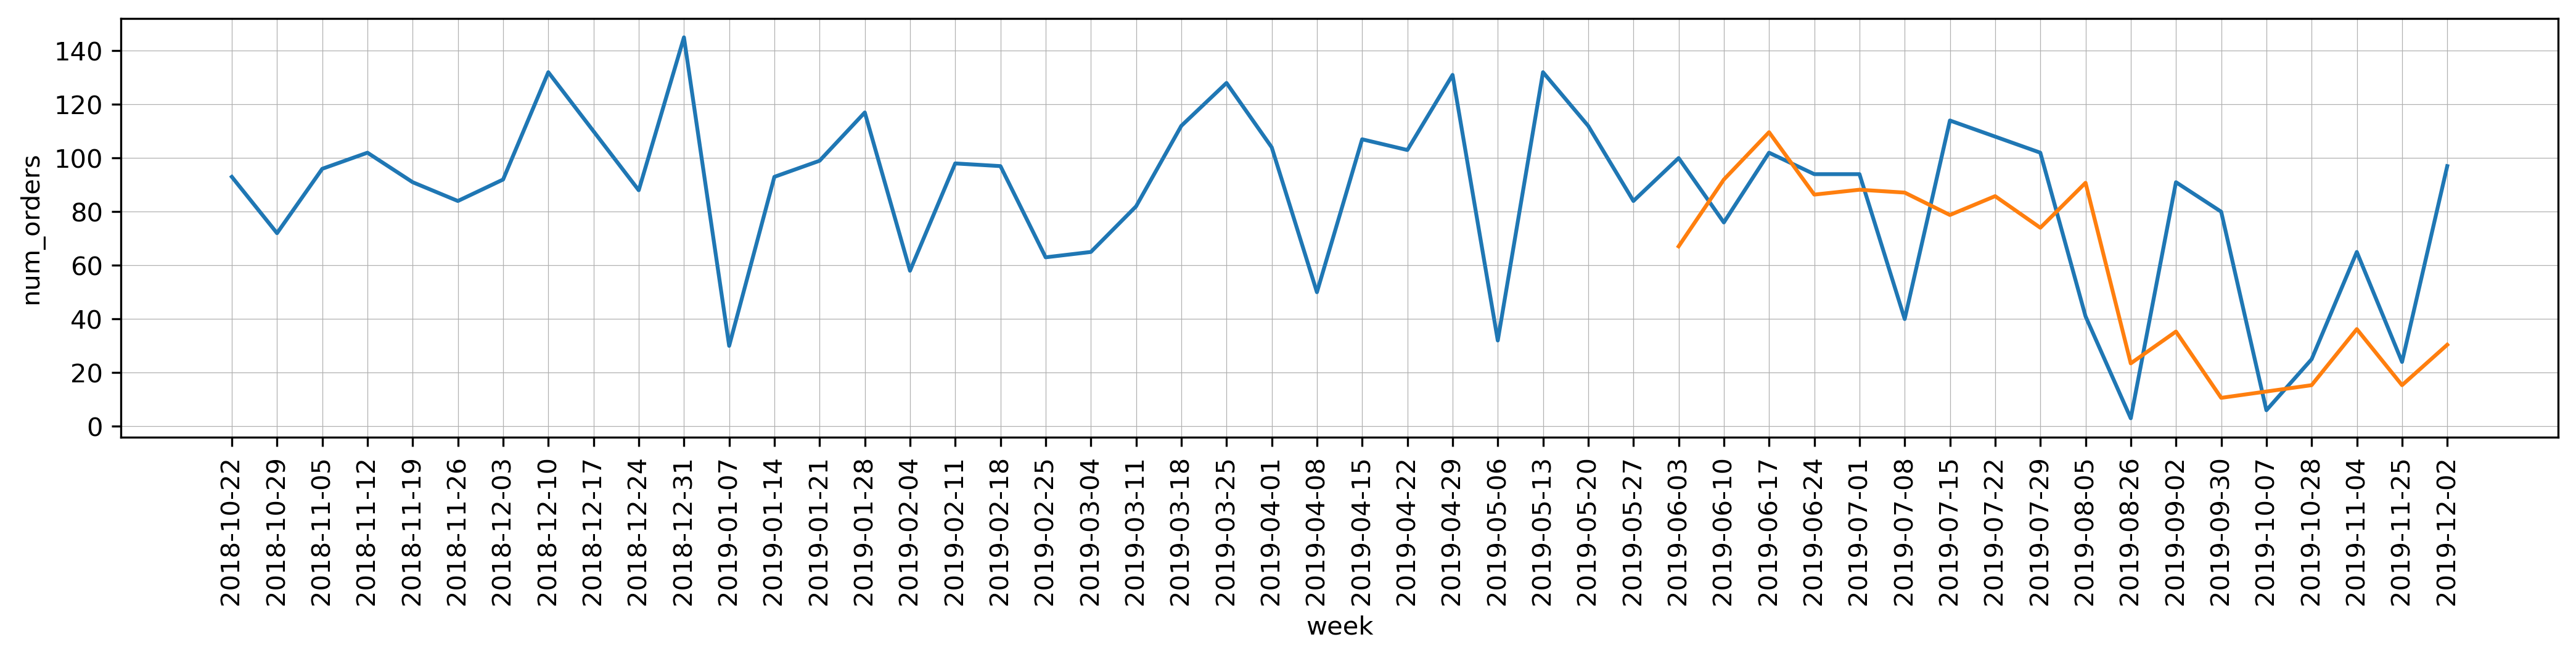

In [48]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_orders.tail(50), x='week', y='num_orders')
sns.lineplot(data=test_df, x='week', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)